# Satellite based river path analysis (Krishna River)

### Importing library

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

### Read All Images & Resized

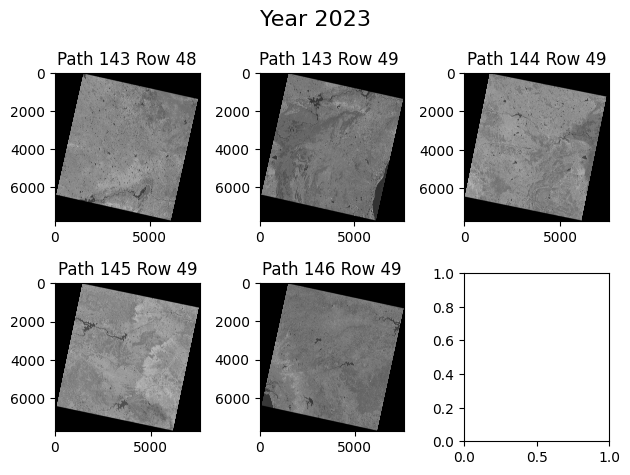

In [2]:
# assuming you have two lists: image_path and titles
image_path = [r"D:\DOCS AND DATASETS\2023\LC08_L2SP_143048_20230301_20230315_02_T1_SR_B5 (1).TIF", 
              r"D:\DOCS AND DATASETS\2023\LC08_L2SP_143049_20230301_20230315_02_T1_SR_B5.TIF", 
              r"D:\DOCS AND DATASETS\2023\LC08_L2SP_144049_20230308_20230316_02_T1_SR_B5.TIF",
             r"D:\DOCS AND DATASETS\2023\LC09_L2SP_145049_20230307_20230309_02_T1_SR_B5.TIF",
             r"D:\DOCS AND DATASETS\2023\LC09_L2SP_146049_20230314_20230316_02_T1_SR_B5.TIF"
             ]
titles = ['Path 143 Row 48', 'Path 143 Row 49 ', 'Path 144 Row 49','Path 145 Row 49', 'Path 146 Row 49']

# define the number of rows and columns for the plot
num_rows = int(np.ceil(len(image_path)/3))
num_cols = 3

# create a figure and axis objects using subplots
fig, axs = plt.subplots(num_rows, num_cols)

# iterate over the image_path list and plot each image with its title
for i, path in enumerate(image_path):
    row = i // num_cols
    col = i % num_cols
    img = plt.imread(path)
    axs[row, col].imshow(img,cmap='gray')
    axs[row, col].set_title(titles[i])

fig.suptitle('Year 2023', fontsize=16)
    
# adjust the plot layout and save the figure
plt.tight_layout()
plt.savefig('images_with_titles.png')

In [ ]:
### Stitching the images

stitched all images with the help of path and row values

## Passing image to QGIS Application for Extracting the River 

After processing all image we got following images

## 2023

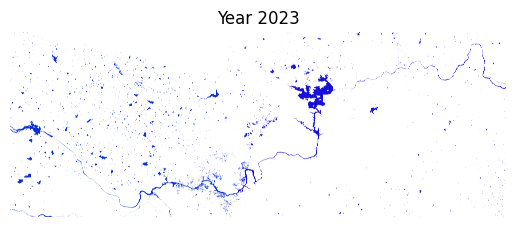

In [3]:
# Load the image from a file path
img2023 = cv2.imread(r"D:\DOCS AND DATASETS\final\2023.png")
# Convert the BGR image to RGB format
img2023 = cv2.cvtColor(img2023, cv2.COLOR_BGR2RGB)
plt.imshow(img2023)
plt.axis('off')
plt.title("Year 2023")
plt.show()

## 2018

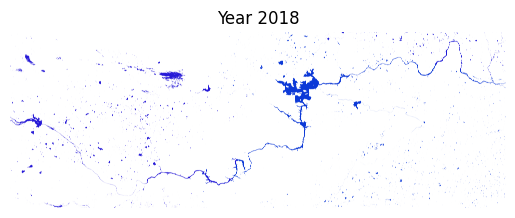

In [4]:
# Load the image from a file path
img2018 = cv2.imread(r"D:\DOCS AND DATASETS\final\2019.png")
# Convert the BGR image to RGB format
img2018 = cv2.cvtColor(img2018, cv2.COLOR_BGR2RGB)
plt.imshow(img2018)
plt.axis('off')
plt.title("Year 2018")
plt.show()

## 2011

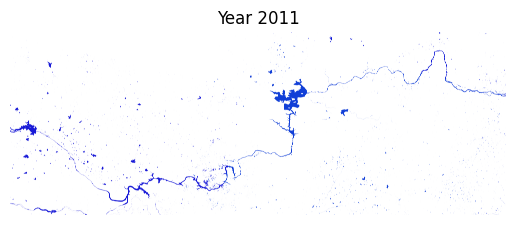

In [5]:
# Load the image from a file path
img2011 = cv2.imread(r"D:\DOCS AND DATASETS\final\2015.png")
# Convert the BGR image to RGB format
img2011 = cv2.cvtColor(img2011, cv2.COLOR_BGR2RGB)
plt.imshow(img2011)
plt.axis('off')
plt.title("Year 2011")
plt.show()

## 1994

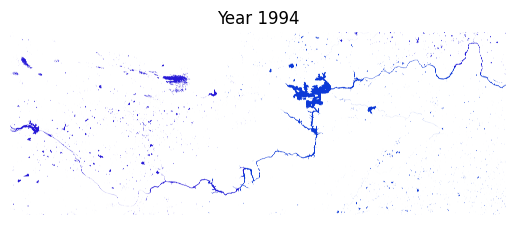

In [6]:
# Load the image from a file path
img1994 = cv2.imread(r"D:\DOCS AND DATASETS\final\1994.png")
# Convert the BGR image to RGB format
img = cv2.cvtColor(img1994, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title("Year 1994")
plt.show()

### Image segmentation 

## 2023

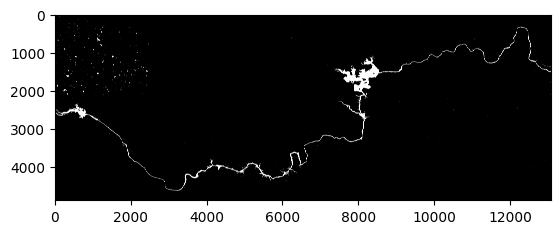

In [7]:
# Load the image from a file path
img2023 = cv2.imread(r"D:\DOCS AND DATASETS\final\2023_f.png")
(h, w) = img2023.shape[:2]
img = cv2.resize(img2023, (w, h))
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.threshold(gry, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply thresholding
_, thresh2023 = cv2.threshold(thr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh2023,cmap='gray')

## 2018

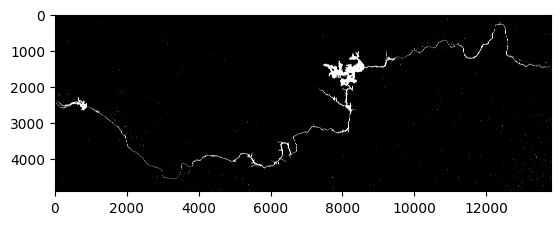

In [8]:
# Load the image from a file path
img2018 = cv2.imread(r"D:\DOCS AND DATASETS\final\2019_f.jpg")
(h, w) = img2018.shape[:2]
img = cv2.resize(img2018, (w, h))
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.threshold(gry, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply thresholding
_, thresh2018 = cv2.threshold(thr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh2018,cmap='gray')

## 2011

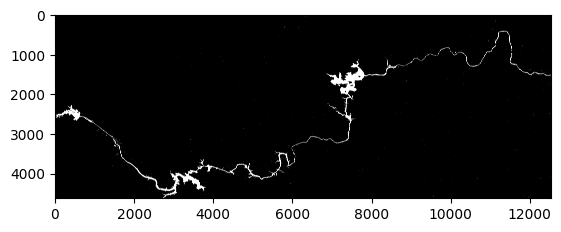

In [9]:
# Load the image from a file path
img2011 = cv2.imread(r"D:\DOCS AND DATASETS\final\2017.png")
(h, w) = img2011.shape[:2]
img = cv2.resize(img2011, (w, h))
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.threshold(gry, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]


# Apply thresholding
_, thresh2011 = cv2.threshold(thr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh2011,cmap='gray')

## 1994

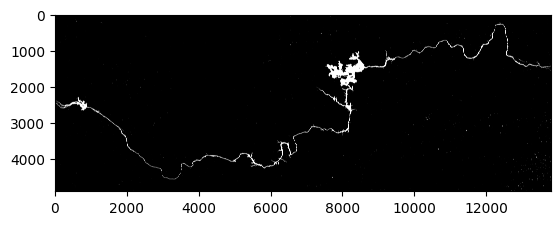

In [10]:
# Load the image from a file path
img1994 = cv2.imread(r"D:\DOCS AND DATASETS\final\1994_f.jpg")
(h, w) = img1994.shape[:2]
img = cv2.resize(img1994, (w, h))
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.threshold(gry, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]


# Apply thresholding
_, thresh1994 = cv2.threshold(thr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh1994,cmap='gray')



### morphological operations and draw contours

## 2023

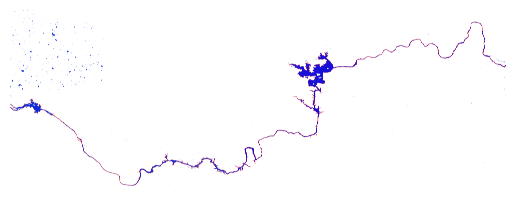

In [11]:

# Apply morphological operations to fill small gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh2023, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that are too small
min_area = 1000
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Find the largest contour
largest_contour = max(filtered_contours, key=cv2.contourArea)

# Draw the largest contour on the original image
cv2.drawContours(img2023, [largest_contour], -1, (0, 0, 255), 2)
img2023 = cv2.cvtColor(img2023, cv2.COLOR_BGR2RGB)
plt.imshow(img2023)
plt.axis('off')
plt.show()

## 2018

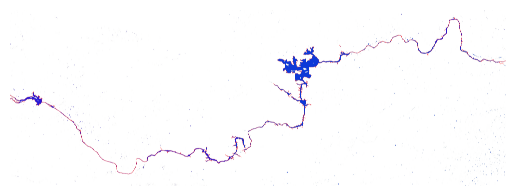

In [12]:

# Apply morphological operations to fill small gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh2018, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that are too small
min_area = 1000
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Find the largest contour
largest_contour = max(filtered_contours, key=cv2.contourArea)

# Draw the largest contour on the original image
cv2.drawContours(img2018, [largest_contour], -1, (0, 0, 255), 2)
img2018 = cv2.cvtColor(img2018, cv2.COLOR_BGR2RGB)
plt.imshow(img2018)
plt.axis('off')
plt.show()

## 2011

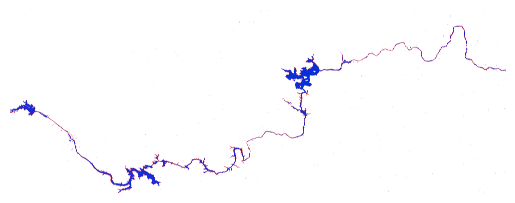

In [13]:

# Apply morphological operations to fill small gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh2011, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that are too small
min_area = 1000
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Find the largest contour
largest_contour = max(filtered_contours, key=cv2.contourArea)

# Draw the largest contour on the original image
cv2.drawContours(img2011, [largest_contour], -1, (0, 0, 255), 2)
img2011 = cv2.cvtColor(img2011, cv2.COLOR_BGR2RGB)
plt.imshow(img2011)
plt.axis('off')
plt.show()

## 1994

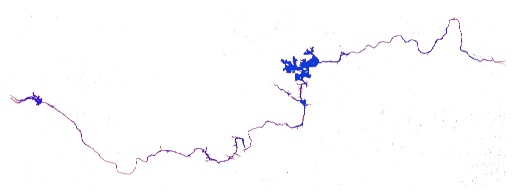

In [14]:

# Apply morphological operations to fill small gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh1994, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that are too small
min_area = 1000
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Find the largest contour
largest_contour = max(filtered_contours, key=cv2.contourArea)

# Draw the largest contour on the original image
cv2.drawContours(img1994, [largest_contour], -1, (0, 0, 255), 2)
img1994 = cv2.cvtColor(img1994, cv2.COLOR_BGR2RGB)
plt.imshow(img1994)
plt.axis('off')
plt.show()

### Calculate the feature (Length, Area , Perimeter, centroid)

## 2023

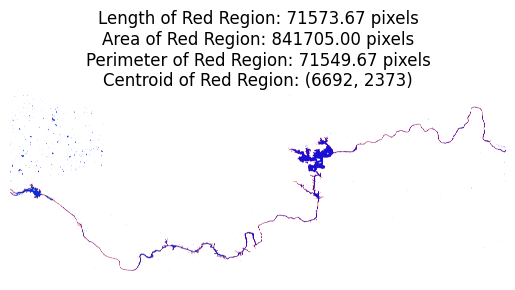

In [15]:
# Load the image
img = cv2.imread(r"D:\DOCS AND DATASETS\final\2023_f.png")

(h, w) = img.shape[:2]
img = cv2.resize(img, (w, h))
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.threshold(gry, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply thresholding
_, thresh = cv2.threshold(thr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations to fill small gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that are too small
min_area = 1000
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Find the largest contour
largest_contour = max(filtered_contours, key=cv2.contourArea)

# Draw the largest contour on the original image
cv2.drawContours(img, [largest_contour], -1, (0, 0, 255), 2)

# Calculate the length of the red region
length = cv2.arcLength(largest_contour, True)

# Calculate the area of the largest contour
area = cv2.contourArea(largest_contour)

# Calculate the perimeter of the largest contour
perimeter = cv2.arcLength(largest_contour, False)

# Calculate the centroid of the largest contour
M = cv2.moments(largest_contour)
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

# Draw the largest contour and centroid on the original image
cv2.drawContours(img, [largest_contour], -1, (0, 0, 255), 2)
cv2.circle(img, (cx, cy), 5, (255, 0, 0), -1)
# Convert the BGR image to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("2023b.png",img)
plt.imshow(img)
plt.axis('off')
plt.title('Length of Red Region: {:.2f} pixels\nArea of Red Region: {:.2f} pixels\nPerimeter of Red Region: {:.2f} pixels\nCentroid of Red Region: ({}, {})'.format(length, area, perimeter, cx, cy))
plt.show()

## 2018

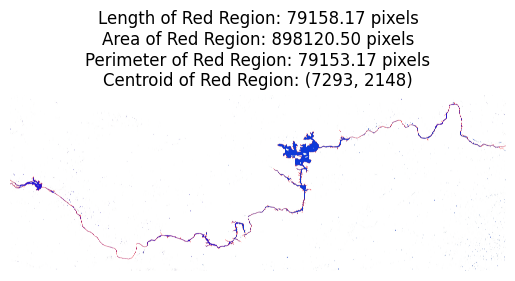

In [16]:
# Load the image
img = cv2.imread(r"D:\DOCS AND DATASETS\final\2019_f.jpg")

(h, w) = img.shape[:2]
img = cv2.resize(img, (w, h))
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.threshold(gry, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply thresholding
_, thresh = cv2.threshold(thr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations to fill small gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that are too small
min_area = 1000
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Find the largest contour
largest_contour = max(filtered_contours, key=cv2.contourArea)

# Draw the largest contour on the original image
cv2.drawContours(img, [largest_contour], -1, (0, 0, 255), 2)

# Calculate the length of the red region
length = cv2.arcLength(largest_contour, True)

# Calculate the area of the largest contour
area = cv2.contourArea(largest_contour)

# Calculate the perimeter of the largest contour
perimeter = cv2.arcLength(largest_contour, False)

# Calculate the centroid of the largest contour
M = cv2.moments(largest_contour)
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

# Draw the largest contour and centroid on the original image
cv2.drawContours(img, [largest_contour], -1, (0, 0, 255), 2)
cv2.circle(img, (cx, cy), 5, (255, 0, 0), -1)
# Convert the BGR image to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("2019b.png",img)
plt.imshow(img)
plt.axis('off')
plt.title('Length of Red Region: {:.2f} pixels\nArea of Red Region: {:.2f} pixels\nPerimeter of Red Region: {:.2f} pixels\nCentroid of Red Region: ({}, {})'.format(length, area, perimeter, cx, cy))
plt.show()

## 2011

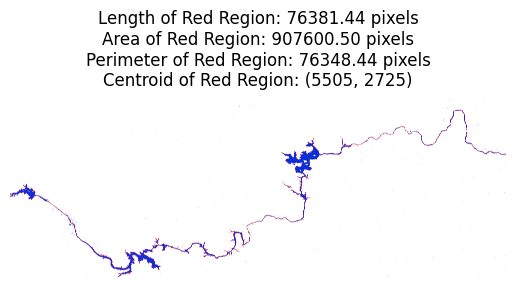

In [17]:
# Load the image
img = cv2.imread(r"D:\DOCS AND DATASETS\final\2017.png")

(h, w) = img.shape[:2]
img = cv2.resize(img, (w, h))
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.threshold(gry, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply thresholding
_, thresh = cv2.threshold(thr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations to fill small gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that are too small
min_area = 1000
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Find the largest contour
largest_contour = max(filtered_contours, key=cv2.contourArea)

# Draw the largest contour on the original image
cv2.drawContours(img, [largest_contour], -1, (0, 0, 255), 2)

# Calculate the length of the red region
length = cv2.arcLength(largest_contour, True)

# Calculate the area of the largest contour
area = cv2.contourArea(largest_contour)

# Calculate the perimeter of the largest contour
perimeter = cv2.arcLength(largest_contour, False)

# Calculate the centroid of the largest contour
M = cv2.moments(largest_contour)
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

# Draw the largest contour and centroid on the original image
cv2.drawContours(img, [largest_contour], -1, (0, 0, 255), 2)
cv2.circle(img, (cx, cy), 5, (255, 0, 0), -1)
# Convert the BGR image to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("2011b.png",img)
plt.imshow(img)
plt.axis('off')
plt.title('Length of Red Region: {:.2f} pixels\nArea of Red Region: {:.2f} pixels\nPerimeter of Red Region: {:.2f} pixels\nCentroid of Red Region: ({}, {})'.format(length, area, perimeter, cx, cy))
plt.show()

## 1994

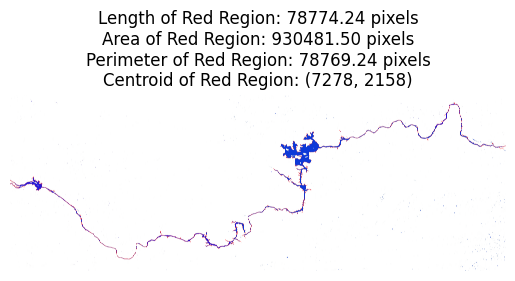

In [18]:
# Load the image
img = cv2.imread(r"D:\DOCS AND DATASETS\final\1994_f.jpg")

(h, w) = img.shape[:2]
img = cv2.resize(img, (w, h))
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.threshold(gry, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Apply thresholding
_, thresh = cv2.threshold(thr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations to fill small gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that are too small
min_area = 1000
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Find the largest contour
largest_contour = max(filtered_contours, key=cv2.contourArea)

# Draw the largest contour on the original image
cv2.drawContours(img, [largest_contour], -1, (0, 0, 255), 2)

# Calculate the length of the red region
length = cv2.arcLength(largest_contour, True)

# Calculate the area of the largest contour
area = cv2.contourArea(largest_contour)

# Calculate the perimeter of the largest contour
perimeter = cv2.arcLength(largest_contour, False)

# Calculate the centroid of the largest contour
M = cv2.moments(largest_contour)
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

# Draw the largest contour and centroid on the original image
cv2.drawContours(img, [largest_contour], -1, (0, 0, 255), 2)
cv2.circle(img, (cx, cy), 5, (255, 0, 0), -1)
# Convert the BGR image to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("1994b.png",img)
plt.imshow(img)
plt.axis('off')
plt.title('Length of Red Region: {:.2f} pixels\nArea of Red Region: {:.2f} pixels\nPerimeter of Red Region: {:.2f} pixels\nCentroid of Red Region: ({}, {})'.format(length, area, perimeter, cx, cy))
plt.show()

### All Year and All Parameter values 

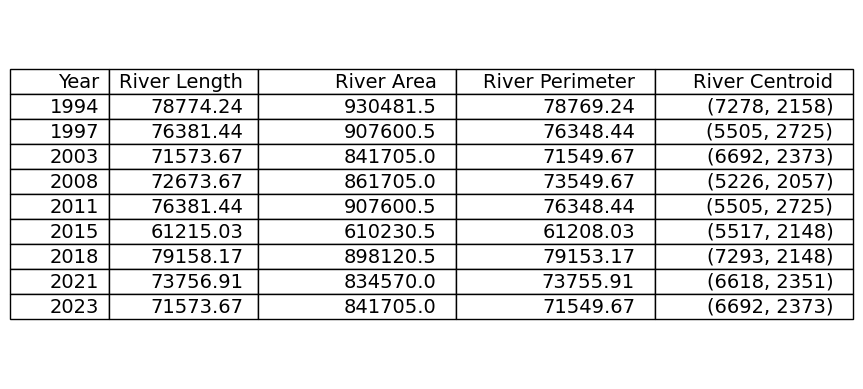

In [19]:
import matplotlib.pyplot as plt

# Sample data
years = [1994,1997,2003,2008,2011,2015,2018,2021,2023]
lengths = [78774.24, 76381.44, 71573.67, 72673.67, 76381.44, 61215.03, 79158.17, 73756.91, 71573.67]
area =[930481.50,907600.50,841705.00,861705.00,907600.50,610230.50,898120.50,834570.00,841705.00]
perimeter=[78769.24,76348.44,71549.67,73549.67,76348.44,61208.03,79153.17,73755.91,71549.67]
centroid=[(7278, 2158),(5505, 2725),(6692, 2373),(5226, 2057),(5505, 2725),(5517, 2148),(7293, 2148),(6618, 2351),(6692, 2373)]

# Create a table using matplotlib
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')

# Add column headers
headers = ['Year', 'River Length','River Area','River Perimeter', 'River Centroid']
# Create the table data as a list of lists
table_data = [headers] + list(zip(years, map(str, lengths), map(str, area), map(str, perimeter), map(str, centroid)))

# Set the column widths to match the number of columns in the table
col_widths = [0.2, 0.3, 0.4, 0.4, 0.4]

# Create the table
table = ax.table(cellText=table_data, colWidths=col_widths, loc='center')

# Customize the table
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 1.5)

# Show the table
plt.show()
